# Partial least squares: Interpretation of plots

Here, we will run partial least squares regression on some generated data, and have a look
at the coefficients and the loadings.

In [65]:
from sklearn.cross_decomposition import PLSRegression
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib notebook
sns.set_theme(style="ticks", context="notebook", palette="muted")

In [55]:
x1 = np.linspace(0, 10, 100)
x2 = np.sin(np.linspace(-np.pi, np.pi, 100))
x3 = x1 + x2

y1 = x1
y1 += np.random.normal(0, 1, size=y1.shape)  # add some noise

y2 = x2
y2 += np.random.normal(0, 0.3, size=y2.shape)  # add some noise

y3 = x3
y3 += np.random.normal(0, 1, size=y3.shape)  # add some noise

xvars = ['x1', 'x2', 'x3']
yvars = ['y1', 'y2', 'y3']

In [56]:
from sklearn.preprocessing import StandardScaler

X = np.column_stack((x1, x2, x3))
Y = np.column_stack((y1, y2, y3))

scaler_x, scaler_y = StandardScaler(), StandardScaler()

Y = scaler_y.fit_transform(Y)
X = scaler_x.fit_transform(X)

<IPython.core.display.Javascript object>


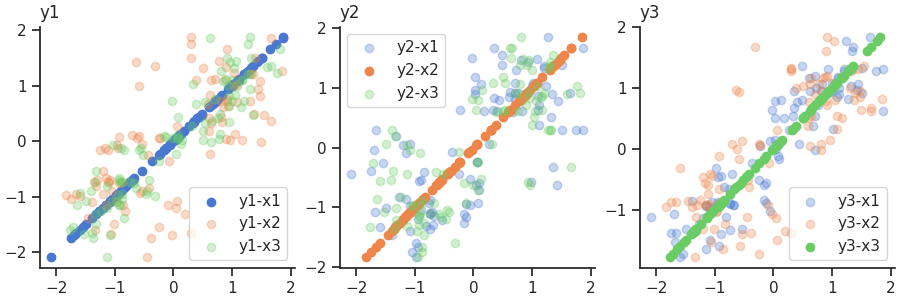

In [57]:
fig, axes = plt.subplots(constrained_layout=True, ncols=3, figsize=(9, 3))
for i, yname in enumerate(yvars):
    ax = axes[i]
    ax.set_title(yname, loc="left")
    for j, xname in enumerate(xvars):
        corr, _ = pearsonr(X[:, j], Y[:, i])
        if corr > 0.95:
            alpha = 1
        else:
            alpha = 0.3
        ax.scatter(X[:, j], Y[:, i], label=f"{yname}-{xname}", alpha=alpha)
    ax.legend()
sns.despine(fig=fig)

In [58]:
model = PLSRegression(scale=False, n_components=2)
model.fit(X, Y)

PLSRegression(scale=False)

<IPython.core.display.Javascript object>


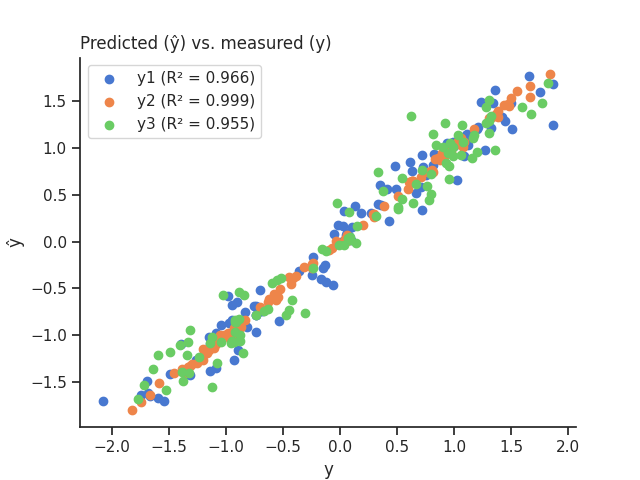

In [62]:
from sklearn.metrics import r2_score

fig, ax = plt.subplots()
Y_hat = model.predict(X)
for i, yvari in enumerate(yvars):
    ax.scatter(
        Y[:, i],
        Y_hat[:, i],
        label=f"{yvari} (R² = {r2_score(Y[:, i], Y_hat[:, i]):.3g})",
    )
ax.legend()
ax.set(xlabel="y", ylabel="ŷ")
ax.set_title("Predicted (ŷ) vs. measured (y)", loc="left")
sns.despine(fig=fig)

## Inspecting regression coefficients

The regression coefficients in the PLS model are stored in `.coef_` of the model we just created:

In [67]:
model.coef_

array([[ 0.57471443, -0.08055273,  0.48778972],
       [-0.08053389,  0.98474619,  0.09236994],
       [ 0.48777275,  0.09238834,  0.44053938]])

<IPython.core.display.Javascript object>


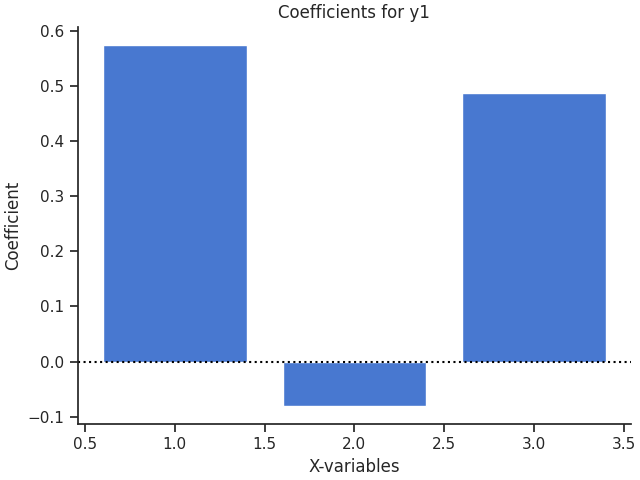

<IPython.core.display.Javascript object>


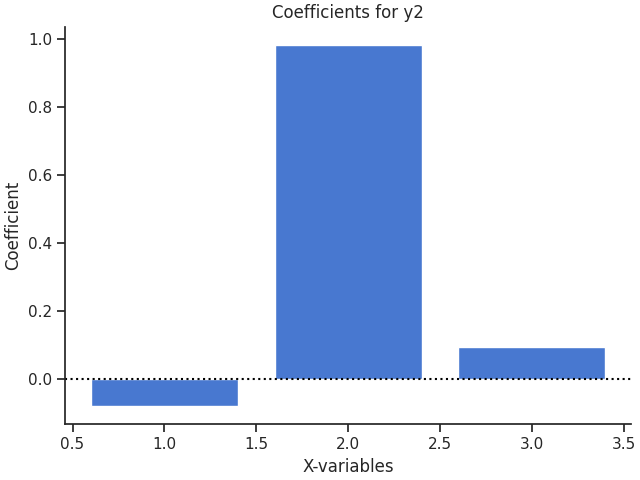

<IPython.core.display.Javascript object>


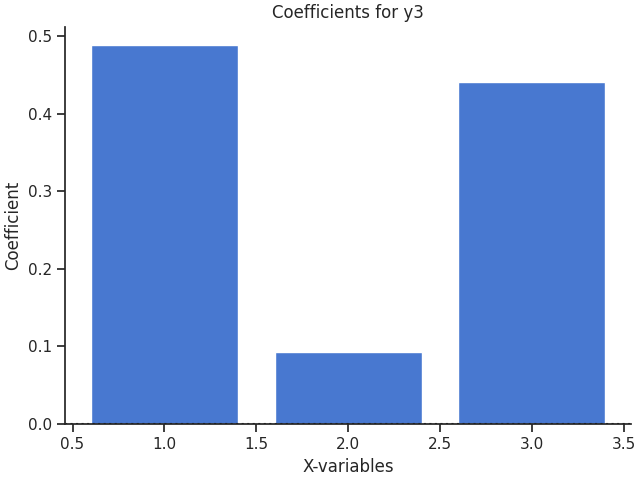

In [69]:
# Plot coefficients:
from fancyplots import mpl_plot_coefficients

mpl_plot_coefficients(model, xvars, yvars);

Judging from the plots above:

- what are the most important variables for predicting $y_1$?

- what are the most important variables for predicting $y_2$?

- what are the most important variables for predicting $y_3$?

Is this as you would expect?

## Inspecting loadings

<IPython.core.display.Javascript object>


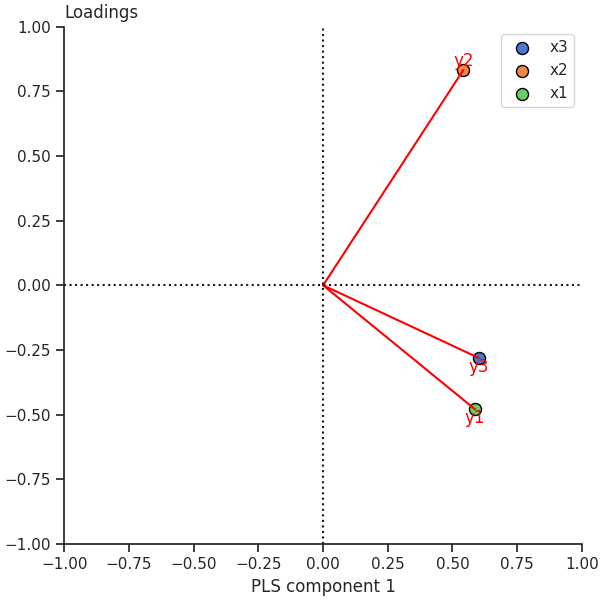

In [73]:
from fancyplots import mpl_plot_loadings
mpl_plot_loadings(model, xvars, yvars, idx1=0, idx2=1, factor=1, xylim=(-1, 1));

Judging from the plot above:


- what $x$-variables are correlated?

- what $y$-variables are correlated?

- what are the most important variables for predicting $y_1$, $y_2$, and $y_3$?

- what do you think will happen to this plot if we adjust $x_3$ so that
  the contribution from $x_2$ is smaller, say $x_3 = x_1 + 0.01 x_2$?